In [1]:
import torch2keras as cvt
import importlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
importlib.reload(cvt);

/opt/conda/envs/schp/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
model_std = cvt._load_std_model("./final.pth")


In [3]:
cvt._torch_to_onnx(model_std, "lip_473x473.onnx")


/home/jupyter/workspace/Self-Correction-Human-Parsing/networks/AugmentCE2P.py:117: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  h, w = int(feats.size(2)), int(feats.size(3))
/home/jupyter/workspace/Self-Correction-Human-Parsing/networks/AugmentCE2P.py:242: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  h = int(h)
/home/jupyter/workspace/Self-Correction-Human-Parsing/networks/AugmentCE2P.py:243: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will

In [ ]:
import onnx
print(onnx.helper.printable_graph(model_onnx.graph))

In [3]:
model_onnx = cvt.onnx.load("lip_473x473.onnx")
cvt.onnx_to_keras(model_onnx, ['input'], verbose=False, change_ordering=True)

AttributeError: module 'torch2keras' has no attribute 'onnx_to_keras'

In [2]:
model_keras = cvt._onnx_to_keras("lip_473x473.onnx")

Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.
Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.
Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.
Unable to use `same` padding. Add ZeroPadding2D layer to fix shapes.


In [3]:
t=1

In [6]:
t[1]

TypeError: 'int' object is not subscriptable

In [ ]:
model_keras.get_config()

In [5]:
out = model_keras(tf.zeros((1, 473, 473, 3)))

In [6]:
out.shape

TensorShape([1, 119, 119, 20])

In [7]:
img = cv2.imread("./inputs/image.png")[..., ::-1] / 255.0
#img = img[200:1200]

In [3]:
model_prepro = cvt.ModelWithPreprocessing(model_keras)

In [4]:
model_prepro.build(input_shape=(1, 473, 473, 3))

In [11]:
out = model_prepro(img.astype(np.float32)[None])

In [5]:
model_prepro.save("./lip_473x473.pb")

INFO:tensorflow:Assets written to: ./lip_473x473.pb/assets


INFO:tensorflow:Assets written to: ./lip_473x473.pb/assets


In [6]:
! zip -r lip_473x473.pb.zip ./lip_473x473.pb

  adding: lip_473x473.pb/ (stored 0%)
  adding: lip_473x473.pb/fingerprint.pb (stored 0%)
  adding: lip_473x473.pb/assets/ (stored 0%)
  adding: lip_473x473.pb/saved_model.pb (deflated 92%)
  adding: lip_473x473.pb/variables/ (stored 0%)
  adding: lip_473x473.pb/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: lip_473x473.pb/variables/variables.index (deflated 80%)
  adding: lip_473x473.pb/keras_metadata.pb (deflated 96%)


In [42]:
model_prepro = tf.saved_model.load("./lip_473x473.pb")

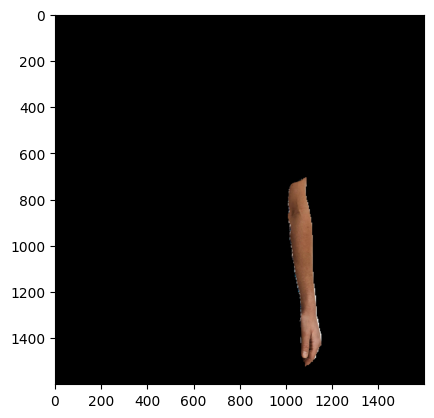

In [13]:
plt.imshow((out[0].numpy()[...,None] == 14) * img)